# Lending Club Loan Data Analysis

### Create a model that predicts whether or not a loan will be default using the historical data.



#### Import libraries


In [179]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras


#### Import the dataset load_data.csv

In [180]:
df = pd.read_csv('loan_data.csv')

In [181]:
df.shape

(9578, 14)

In [182]:
df.sample(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9468,0,educational,0.1461,168.93,10.578980,2.63,667,3180.041667,3288,74.7,5,0,0,0
943,1,credit_card,0.1103,147.39,10.527887,24.97,757,6780.000000,22403,32.0,0,0,0,0
7468,1,major_purchase,0.0751,202.22,10.621327,16.80,747,6750.041667,6238,14.9,1,0,0,0
7745,0,all_other,0.0712,30.94,10.819778,1.10,772,5910.000000,0,0.8,3,0,0,0
4921,1,all_other,0.0740,217.42,10.736397,23.87,772,2912.000000,1095,5.2,2,0,0,0
6710,1,small_business,0.1670,170.41,11.034890,23.86,677,4590.041667,3024,24.4,3,0,0,0
3092,1,credit_card,0.1126,492.95,11.849398,13.52,747,4919.958333,29790,15.6,0,0,0,0
2712,1,all_other,0.1632,331.95,10.819778,1.46,692,1620.000000,4700,51.6,1,0,0,0
6917,1,debt_consolidation,0.1392,614.47,11.512925,17.52,692,5010.041667,9360,43.7,0,0,0,0
5321,1,all_other,0.1218,49.95,10.596635,22.23,692,2220.000000,6834,55.1,2,0,0,0


In [183]:
## not.fully.paid is the target

df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

#### Feature transformation
##### Transform categorical values into numerical values (discrete)



In [184]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [185]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [186]:
## purpose column is of object type and has categorical data
## Performing OHE one hot encoding

df1 = pd.get_dummies(df, columns=["purpose"], prefix=["purpose"])


In [187]:
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [188]:
print(df.shape)
print(df1.shape)

(9578, 14)
(9578, 20)


#### EDA on the columns

In [189]:
print(X.shape)
print(y.shape)

(3066, 11)
(3066,)


In [190]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report



Text(0.5, 1, 'Correlation between not.fully.paid and remaining attributes')

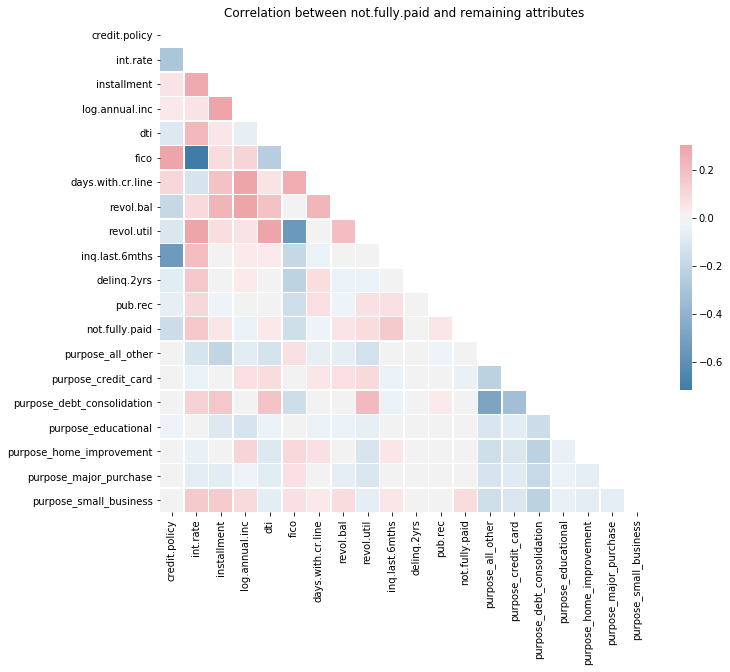

In [191]:
corr = df1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation between not.fully.paid and remaining attributes')

### From the above correlation graph, we can infer that the
### target var not.full.paid is strongly dependent/positively correlated to columns:inq.last.6mths 
### int.rate, installment, dti, revol.util, pub.rec
### and not.full.paid is negatively correlated to: credit.policy, log.annual.inc, fico, 
### days.with.crline, delinq.2yrs

In [192]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [193]:
### updating the X_train with the features having strong correlation
df_train =df[['inq.last.6mths','int.rate','installment' ,'dti','revol.util','pub.rec','credit.policy','log.annual.inc','fico','days.with.cr.line','delinq.2yrs','not.fully.paid']]

In [194]:
df_train.head()

,inq.last.6mths,int.rate,installment,dti,revol.util,pub.rec,credit.policy,log.annual.inc,fico,days.with.cr.line,delinq.2yrs,not.fully.paid
0,0,0.1189,829.10,19.48,52.1,0,1,11.350407,737,5639.958333,0,0
1,0,0.1071,228.22,14.29,76.7,0,1,11.082143,707,2760.000000,0,0
2,1,0.1357,366.86,11.63,25.6,0,1,10.373491,682,4710.000000,0,0
3,1,0.1008,162.34,8.10,73.2,0,1,11.350407,712,2699.958333,0,0
4,0,0.1426,102.92,14.97,39.5,0,1,11.299732,667,4066.000000,1,0


In [195]:
df_train['credit.policy'].max()

1

In [196]:
### display the unique values in a column, so that we can know the columns requiring scaling

def print_all_cols_with_type_Unique_values(df_In):
    for col in df_In:
        print(f'{col}:{df_In[col].unique()}')

In [197]:
df_train.select_dtypes(include=np.number)

,inq.last.6mths,int.rate,installment,dti,revol.util,pub.rec,credit.policy,log.annual.inc,fico,days.with.cr.line,delinq.2yrs,not.fully.paid
0,0,0.1189,829.10,19.48,52.1,0,1,11.350407,737,5639.958333,0,0
1,0,0.1071,228.22,14.29,76.7,0,1,11.082143,707,2760.000000,0,0
2,1,0.1357,366.86,11.63,25.6,0,1,10.373491,682,4710.000000,0,0
3,1,0.1008,162.34,8.10,73.2,0,1,11.350407,712,2699.958333,0,0
4,0,0.1426,102.92,14.97,39.5,0,1,11.299732,667,4066.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9573,2,0.1461,344.76,10.39,82.1,0,0,12.180755,672,10474.000000,0,1
9574,5,0.1253,257.70,0.21,1.1,0,0,11.141862,722,4380.000000,0,1
9575,8,0.1071,97.81,13.09,82.9,0,0,10.596635,687,3450.041667,0,1
9576,5,0.1600,351.58,19.18,3.2,0,0,10.819778,692,1800.000000,0,1


In [198]:
## Looking at the below results of print_all_cols_with_type_Unique_values() forming the list of col_ohe
col_ohe = ['installment', 'inq.last.6mths','dti','revol.util','log.annual.inc','fico','days.with.cr.line','delinq.2yrs','pub.rec']

In [199]:
print_all_cols_with_type_Unique_values(df_train)

inq.last.6mths:[ 0  1  2  3  4  5  6  8  7 33  9 18 14 15 13 12 10 19 11 16 20 27 25 28
 31 24 17 32]
int.rate:[0.1189 0.1071 0.1357 0.1008 0.1426 0.0788 0.1496 0.1114 0.1134 0.1221
 0.1347 0.1324 0.0859 0.0714 0.0863 0.1103 0.1317 0.0894 0.1039 0.1513
 0.08   0.1355 0.1229 0.0901 0.0743 0.1375 0.0807 0.1028 0.087  0.1122
 0.0996 0.0933 0.0838 0.0775 0.1059 0.1596 0.1154 0.1343 0.1249 0.0964
 0.1186 0.1501 0.128  0.1091 0.1217 0.1533 0.0712 0.1438 0.1565 0.1467
 0.1312 0.147  0.1407 0.1014 0.1046 0.133  0.0983 0.1393 0.092  0.1236
 0.1362 0.1078 0.1583 0.1109 0.1141 0.1267 0.1204 0.0951 0.1172 0.1299
 0.1488 0.152  0.1425 0.1836 0.1615 0.06   0.0832 0.1261 0.0945 0.1197
 0.1387 0.0976 0.1292 0.0737 0.0768 0.1166 0.1418 0.1545 0.1482 0.1703
 0.145  0.1671 0.1576 0.1608 0.164  0.1734 0.1051 0.157  0.1222 0.1273
 0.1379 0.1253 0.1128 0.1286 0.1287 0.097  0.1001 0.1538 0.1191 0.1254
 0.1159 0.138  0.1096 0.1064 0.1349 0.1033 0.1475 0.1601 0.1507 0.1412
 0.1633 0.1696 0.1146 0.1304 0.1272 0

In [200]:
## Let's scale the numeric columns using minMax scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [201]:
df_train[col_ohe] = scaler.fit_transform(df_train[col_ohe])

In [202]:
## checking the scaling
print_all_cols_with_type_Unique_values(df_train)

inq.last.6mths:[0.         0.03030303 0.06060606 0.09090909 0.12121212 0.15151515
 0.18181818 0.24242424 0.21212121 1.         0.27272727 0.54545455
 0.42424242 0.45454545 0.39393939 0.36363636 0.3030303  0.57575758
 0.33333333 0.48484848 0.60606061 0.81818182 0.75757576 0.84848485
 0.93939394 0.72727273 0.51515152 0.96969697]
int.rate:[0.1189 0.1071 0.1357 0.1008 0.1426 0.0788 0.1496 0.1114 0.1134 0.1221
 0.1347 0.1324 0.0859 0.0714 0.0863 0.1103 0.1317 0.0894 0.1039 0.1513
 0.08   0.1355 0.1229 0.0901 0.0743 0.1375 0.0807 0.1028 0.087  0.1122
 0.0996 0.0933 0.0838 0.0775 0.1059 0.1596 0.1154 0.1343 0.1249 0.0964
 0.1186 0.1501 0.128  0.1091 0.1217 0.1533 0.0712 0.1438 0.1565 0.1467
 0.1312 0.147  0.1407 0.1014 0.1046 0.133  0.0983 0.1393 0.092  0.1236
 0.1362 0.1078 0.1583 0.1109 0.1141 0.1267 0.1204 0.0951 0.1172 0.1299
 0.1488 0.152  0.1425 0.1836 0.1615 0.06   0.0832 0.1261 0.0945 0.1197
 0.1387 0.0976 0.1292 0.0737 0.0768 0.1166 0.1418 0.1545 0.1482 0.1703
 0.145  0.1671 0.1576 0

### Looking at the balance of the dataset

In [204]:
y.value_counts()

1    1533
0    1533
Name: not.fully.paid, dtype: int64

#### The dataset is higly imblanaced for 'not.fully.paid'==1, there are 1533 records
#### for 'not.fully.paid'==0 there are 8045 records

In [205]:
count_class_0, count_class_1 = df_train['not.fully.paid'].value_counts()


In [206]:
df_class_0 = df_train[ df_train['not.fully.paid'] ==0 ]
df_class_1 = df_train[ df_train['not.fully.paid'] ==1 ]

In [207]:
count_class_0

8045

#### Under sampling

In [208]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [209]:
print('Random under-sampling:')
print(df_test_under['not.fully.paid'].value_counts())

Random under-sampling:
1    1533
0    1533
Name: not.fully.paid, dtype: int64


### train set and test set formation
#### , stratify=y to ensure equal no. of both 'not.fully.paid'==0 and ==1

In [210]:
X = df_test_under.drop('not.fully.paid',axis='columns')
y = df_test_under['not.fully.paid']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [211]:
y_train.value_counts()


1    1226
0    1226
Name: not.fully.paid, dtype: int64

In [212]:
X_train.shape

(2452, 11)

### Training

### Builiding ANN with 11 input neurons

In [222]:

model = keras.Sequential([
    keras.layers.Dense(11, input_dim=11, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
77/77 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.4482
Epoch 2/100
77/77 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4967
Epoch 3/100
77/77 [==============================] - 0s 997us/step - loss: 0.6928 - accuracy: 0.5090
Epoch 4/100
77/77 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5135
Epoch 5/100
77/77 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5473
Epoch 6/100
77/77 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5759
Epoch 7/100
77/77 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5909
Epoch 8/100
77/77 [==============================] - 0s 881us/step - loss: 0.6753 - accuracy: 0.5909
Epoch 9/100
77/77 [==============================] - 0s 907us/step - loss: 0.6729 - accuracy: 0.5987
Epoch 10/100
77/77 [==============================] - 0s 842us/step - loss: 0.6712 - accuracy: 0.5914
E

In [224]:
print(model.evaluate(X_test, y_test))


20/20 [==============================] - 0s 692us/step - loss: 0.6260 - accuracy: 0.6596
[0.6260172128677368, 0.6596091389656067]


In [225]:

y_preds = model.predict(X_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.61      0.64       307
           1       0.64      0.71      0.68       307

    accuracy                           0.66       614
   macro avg       0.66      0.66      0.66       614
weighted avg       0.66      0.66      0.66       614



### Model accuracy achieved is 65%